# 보스턴 주택가격 데이터셋

케라스의 [tf.keras.datasets.reuters](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters)로부터 보스턴 주택가격 데이터셋을 불러오겠습니다.
- 1970년대 보스턴 교외의 타운별 데이터 506개
- 각 행은 타운별 데이터
- 각 열은 주택 가격에 영향을 미치는 요소 13개
- 훈련용 404개, 테스트용 102개
- 라벨은 주택가격 중앙값 (단위 : 천달러)

![](https://drive.google.com/uc?id=1GkxuiFIvsL_k0u5iYNmWsF6oaOG3Ed4P)

In [1]:
from tensorflow import keras
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(f"훈련용 : {train_data.shape}")
print(f"테스트용 : {test_data.shape}")

훈련용 : (404, 13)
테스트용 : (102, 13)


주택 가격에 영향을 미치는 13개의 요소는 다음과 같습니다.
- CRIM : per capita crime rate by town (범죄율)
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise) (강변)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling (평균 방 개수)
- AGE : proportion of owner-occupied units built prior to 1940 (노후주택 비율)
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per $10,000 (재산세 세율)
- PTRATIO : pupil-teacher ratio by town (학생/교사 비율)
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT : lower status of the population (하위계층 비율)

In [2]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

파이썬데이터분석 시간에 배운 판다스를 이용해 훈련 데이터를 출력해보겠습니다.

In [3]:
import pandas as pd

df = pd.DataFrame(train_data, columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


라벨을 마지막 열에 추가하겠습니다.  
타운별 주택가격 중앙값(MEDV)입니다.  
단위는 천달러입니다.

In [4]:
df['MEDV'] = train_targets
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


기본적인 통계정보를 출력해보겠습니다.

In [5]:
train_stats = df.describe()
train_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.745111,9.240734,0.00632,0.081437,0.26888,3.674808,88.9762
ZN,404.0,11.480198,23.767711,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,404.0,11.104431,6.811308,0.46000,5.130000,9.69000,18.100000,27.7400
CHAS,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.557356,0.117293,0.38500,0.453000,0.53800,0.631000,0.8710
RM,404.0,6.267082,0.709788,3.56100,5.874750,6.19850,6.609000,8.7250
AGE,404.0,69.010644,27.940665,2.90000,45.475000,78.50000,94.100000,100.0000
DIS,404.0,3.740271,2.030215,1.12960,2.077100,3.14230,5.118000,10.7103
RAD,404.0,9.440594,8.698360,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,405.898515,166.374543,188.00000,279.000000,330.00000,666.000000,711.0000


seaborn의 [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)을 사용해서 몇몇 조합의의 산포도를 그려보겠습니다.  
주택가격 예측이 목적이므로 맨 오른쪽 열을 순서대로 해석해보죠.
- 대부분 범죄율(CRIM)이 낮지만 왼쪽 위에 점이 몇개 찍혀 있습니다. 우범지대겠지요. 집값(MEDV)이 낮습니다.
- 방 개수(RM)는 집값(MEDV)과 비례합니다.
- 하위계층비율(LSTAT)은 집값과 반비례합니다.
- 집값(MEDV)의 히스토그램입니다.

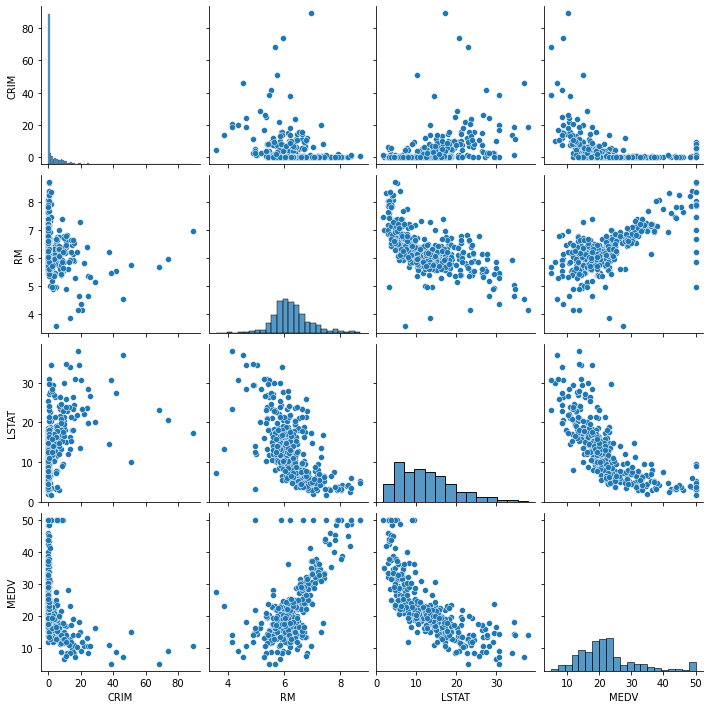

In [6]:
import seaborn as sns
sns.pairplot(df[["CRIM","RM","LSTAT","MEDV"]])

**[실습1] (5분) 테스트 데이터에 라벨을 추가한 데이터 프레임을 출력하시오.**

In [7]:
df_test = pd.DataFrame(test_data, columns=columns)
df_test['MEDV'] = test_targets
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.2
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
98,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
99,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
100,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


각 특성들은 스케일이 매우 다릅니다.  
학습시 스케일이 작은 특성은 무시되고 스케일이 큰 특성은 지배적이 됩니다.  
결과적으로는 적은 정보를 지닌 데이터로 학습시키는 셈이 됩니다.  
이를 방지하기 위해 데이터를 특성별로 정규화해야합니다.  
주의할 점은 테스트 데이터를 정규화할 때 훈련 데이터의 평균과 표준편차를 사용한다는 점입니다.

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# 회귀

우리가 여태까지 공부한 문제는 분류(classification)문제입니다.  
시험으로 치면 객관식 문제를 푸는 셈이지요.  
MNIST, Fashion MNIST는 10지선다 문제를 푸는 셈이고 로이터 뉴스는 46지선다 문제를 푸는 셈이고 IMDB는 OX 문제를 푸는 셈입니다.  
분류문제에서는 통상적으로 교차 엔트로피(cross entropy)를 손실함수로 사용합니다. 또한, 평가지표로는 정확도(accuracy)를 사용합니다.  
![](https://drive.google.com/uc?id=1wdEkIUaKqrAh76qYB41eKUkEKHergDy0)

---
회귀(regression)문제는 시험으로 치면 주관식 문제를 푸는 셈입니다.  
내일 더울지 추울지 예측하는 문제는 분류문제이고 내일 기온을 예측하는 문제는 회귀문제입니다.  
회귀문제에서는 평가지표로 정확도를 사용해서는 안됩니다.  
내일 기온을 칼같이 예측하기는 어려울테니까요.  
회귀문제에서는 평가지표로 평균절대오차(Mean Absolute Error)를 사용합니다.  
두 벡터 $(x_1,x_2,\cdots,x_n)$, $(y_1,y_2,\cdots,y_n)$의 평균절대오차는 이름 그대로 오차의 절대값의 평균 ${\rm MAE} = {1 \over n}\sum_{i=1}^n |y_i-x_i|$으로 정의합니다.  
평가시 평균절대오차는 작을수록 좋습니다 (정확도는 클수록 좋았죠).  
손실함수는 통상적으로 평균제곱오차(Mean Squared Error)를 사용합니다.  
두 벡터 $(x_1,x_2,\cdots,x_n)$, $(y_1,y_2,\cdots,y_n)$의 평균제곱오차는 이름 그대로 오차의 제곱의 평균 ${\rm MSE} = {1 \over n}\sum_{i=1}^n (y_i-x_i)^2$으로 정의합니다.  
평균제곱오차는 [딥러닝I](https://youtu.be/Bj4TS9ip9SM?t=897)에서 등장은 했는데 실제로는 교차엔트로피만 사용해왔죠.  
![](https://drive.google.com/uc?id=1kDAhPbUz7_uNGF_sc1HEGcB0EzAd87ik)

---
예를 들어, $(1,2,3,4,5)$와 $(3,3,3,3,3)$의 평균절대오차는
$$
{\rm MAE} = {1 \over 5}(|1-3|+|2-3|+|3-3|+|4-3|+|5-3|) = {1 \over 5}(2+1+0+1+2) = {6 \over 5}
$$
이고 평균제곱오차는
$$
{\rm MSE} = {1 \over 5}((1-3)^2+(2-3)^2+(3-3)^2+(4-3)^2+(5-3)^2) = {1 \over 5}(4+1+0+1+4) = 2
$$
입니다.  
이 예에서 보다시피 분산이 평균분포와의 평균제곱오차입니다.

---
신경망을 다음과 같이 구성하겠습니다.  
입력 뉴런의 수는 데이터의 특성수이고 출력 뉴런의 수는 1입니다.  
이진분류에서는 마지막층에서 시그모이드 변환을 했지만 회귀에서는 통상적으로 아무것도 하지 않습니다.  
이진분류에서는 확률을 출력해야 하니까 시그모이드 변환을 했지만 주택가격은 0가 1사이에 있을 필요가 없으니까요.  
[compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) 메서드에서 `loss="mse"`로 손실함수를 평균제곱오차로 설정하고 `metrics="mae"`로 평가지표를 평균절대오차로 설정합니다.  
앞으로 신경망을 반복해서 초기화할거라서 아예 신경망을 생성하는 함수를 만들어 놓겠습니다.  
![](https://drive.google.com/uc?id=1di1n97y6s1Fbsr-B-9wl-m1onhdlt_w6)

---
신경망의 출력값이 $x_1$이고 라벨이 $y_1$이라면 평균제곱오차는 $(x_1-y_1)^2$이고 평균절대오차는 $|x_1-y_2|$입니다.  
$n$개의 배치묶음이 입력되어 출력값이 $x_1,x_2,\cdots,x_n$이고 라벨이 $y_1,\cdots,y_n$이라면 평균을 하게 되어 ${1 \over n}\sum_{i=1}^n (y_i-x_i)^2$와 ${1 \over n}\sum_{i=1}^n |y_i-x_i|$이 나옵니다.  
다시말해 배치묶음을 입력하면 두 벡터 $(x_1,x_2,\cdots,x_n)$, $(y_1,y_2,\cdots,y_n)$의 평균제곱오차와 평균절대오차가 됩니다.

---
입력데이터는 파란색입니다.  
이를 입력받아서 역전파를 통해 가급적 빨간색과 비슷한 값을 신경망이 출력할 수 있도록 파라미터들을 업데이트합니다.  
![](https://drive.google.com/uc?id=1VytfDs5vZowI7e6GjRX40ZPPqrMvHTg4)

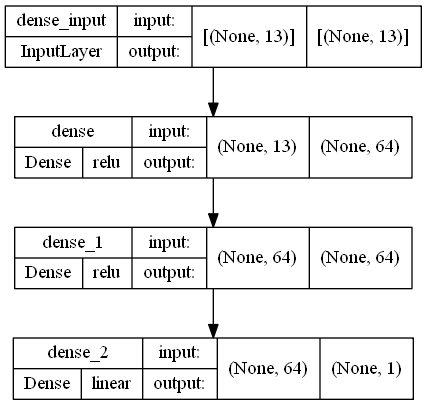

In [9]:
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

def build_model():
    model = keras.Sequential([
        Dense(64, input_shape=(13,), activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics="mae")
    return model

model=build_model()
plot_model(model, show_shapes=True, show_layer_activations=True)

# K-겹 검증 (K-fold Validation)

훈련 데이터가 404개 밖에 없습니다.  
하이퍼 파라미터 탐색을 위해 훈련데이터와 검증데이터로 분할해야 하는데 데이터가 적어서 검증데이터에 적은 양을 할당할 수 밖에 없습니다.  
적은 양때문에 샘플링 편차가 커서 검증 결과를 믿을 수가 없습니다.  
이럴때 쓰는 방법이 K-겹 검증입니다.  
훈련 데이터를 K-등분한 후 하나를 검증데이터로 사용합니다.  
이렇게 얻은 K개의 검증결과를 평균합니다.  
[딥러닝II](https://youtu.be/iVI51L0h3LQ?t=813)에서 다룬 내용입니다.  
![](https://drive.google.com/uc?id=1N9g6DhhKpj0WjzzIj1ZDRN7YmZAj8UVm)

In [10]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


샘플링 수가 적어서 편차가 꽤 되네요.

In [11]:
print(all_scores)

[1.9694178104400635, 2.3728830814361572, 2.4231255054473877, 2.3811073303222656]


넷을 평균하면 더 신뢰할 수 있습니다.  
K-겹 검증을 하는 이유입니다.

In [12]:
print(np.mean(all_scores))

2.2866334319114685


본격적으로 K-겹 검증을 사용해서 최적의 학습회수를 찾겠습니다.  
오랫동안 훈련시켜서 과적합을 일으킵니다.  
한참 걸리니 잠시 쉬었다 오세요.  
에퍽별 평균절대오차가 총 4묶음 나올텐데 이걸 다시 묶습니다.

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


각 에퍽별로 4개의 평균절대오차를 평균합니다.

In [14]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

그래프를 그려보면 초반 평균절대오차가 너무 커서 언제부터 과적합이 일어나는지 눈으로 확인이 어렵습니다.

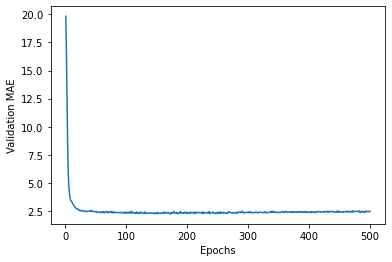

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

지나치게 큰 초반 10에퍽은 제외하겠습니다.  
변동이 크지만 대략 130에퍽부터 과적합이 시작되네요.

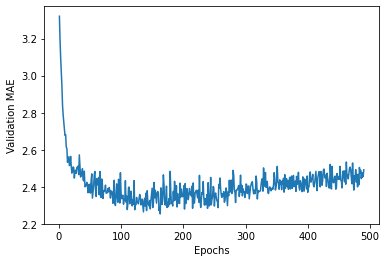

In [16]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 학습, 평가, 예측

훈련 데이터 전체를 사용해 130에퍽동안 훈련시키겠습니다.

In [17]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.3329 - mae: 2.5633


학습할때마다 달라지지만 테스트 데이터로 확인한 최종 평균절대오차는 대략 2,600달러 정도네요.

In [18]:
test_mae_score

2.5632832050323486

첫번째 테스트 데이터에 대한 예측가격과 실제가격입니다.  
학습할때마다 오차는 달라집니다.

In [19]:
predictions = model.predict(test_data)
print(f"예측가격 : {predictions[0]}")
print(f"실제가격 : {test_targets[0]}")

예측가격 : [7.6913495]
실제가격 : 7.2


**[실습2] (5분) 1번 문제에서 구한 데이터프레임에 신경망의 예측값을 추가해서 출력하시오.**

In [20]:
df_test["PRED"]=predictions
df_test.round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRED
0,1.554,-0.484,1.028,-0.257,1.038,0.235,1.110,-0.940,1.676,1.565,0.784,-3.485,2.251,7.2,7.691000
1,-0.392,-0.484,-0.161,-0.257,-0.088,-0.499,0.856,-0.684,-0.396,0.157,-0.308,0.427,0.479,18.8,18.785000
2,-0.400,-0.484,-0.869,-0.257,-0.362,-0.398,-0.846,0.529,-0.511,-1.095,0.784,0.448,-0.414,19.0,21.177999
3,-0.268,-0.484,1.246,3.894,0.407,-0.024,0.845,-0.958,-0.511,-0.017,-1.718,-0.169,-0.999,27.0,32.532001
4,-0.398,-0.484,-0.972,-0.257,-0.925,-0.206,-0.438,0.004,-0.741,-0.956,0.011,0.429,-0.594,22.2,24.400999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.029,-0.484,1.028,3.894,1.371,3.545,0.498,-0.905,1.676,1.565,0.784,-0.002,-1.028,21.9,45.749001
98,-0.397,-0.484,0.254,-0.257,-1.027,0.008,-2.258,0.252,-0.511,-0.048,0.102,0.427,-0.823,24.1,25.069000
99,-0.207,-0.484,1.246,3.894,0.407,2.165,1.046,-0.838,-0.511,-0.017,-1.718,0.371,-1.493,50.0,45.342999
100,-0.367,-0.484,-0.721,3.894,-0.430,0.965,0.698,-0.433,-0.166,-0.595,-0.490,0.393,-0.418,26.7,29.617001


**[실습3] (5분) 실제가격과 예측가격의 산포도를 그리시오. $y=x$의 그래프도 그려넣으시오.**

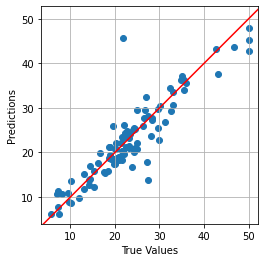

In [21]:
plt.scatter(test_targets, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('square')
plt.grid()
plt.plot([0,60],[0,60],'r')
plt.show()

**[실습4] (5분) (예측가격 - 실제가격)의 히스토그램을 그리시오.**

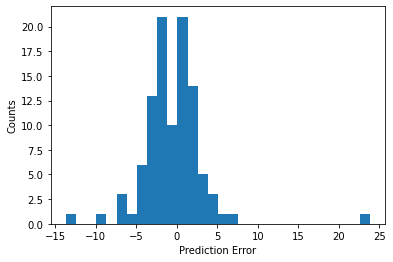

In [22]:
error = predictions.flatten() - test_targets
plt.hist(error, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Counts")
plt.show()

**[실습5] (10분) (i) 앞 8개 특성만 사용해서 훈련시킨후 평가하시오.**

In [23]:
train_data_8 = train_data[:,:8]
test_data_8 = test_data[:,:8]

model_8 = keras.Sequential([
        Dense(64, input_shape=(8,), activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)])

model_8.compile(optimizer="rmsprop", loss="mse", metrics="mae")

model_8.fit(train_data_8, train_targets, epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model_8.evaluate(test_data_8, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 21.2283 - mae: 3.1881
3.1881253719329834


**(ii) 앞 4개 특성만 사용해서 훈련시킨후 평가하시오.**

In [24]:
train_data_4 = train_data[:,:4]
test_data_4 = test_data[:,:4]

model_4 = keras.Sequential([
        Dense(64, input_shape=(4,), activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)])

model_4.compile(optimizer="rmsprop", loss="mse", metrics="mae")

model_4.fit(train_data_4, train_targets, epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model_4.evaluate(test_data_4, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 46.8741 - mae: 4.9624
4.962380409240723


# 싸이킷런을 이용한 K-겹 검증

[sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)를 이용하면 더 편하게 K-겹 검증 코드를 작성할 수 있습니다.

In [25]:
from sklearn.model_selection import KFold

k = 4
num_epochs = 100
all_scores = []
kfold = KFold(n_splits=k)

for train_idx, val_idx in kfold.split(train_data):
    partial_train_data, val_data = train_data[train_idx], train_data[val_idx]
    partial_train_targets, val_targets = train_targets[train_idx], train_targets[val_idx]
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
print(all_scores)
print(np.mean(all_scores))

[1.9264471530914307, 2.7052834033966064, 2.481430768966675, 2.362963914871216]
2.369031310081482
